# Homework 4

Michael Roussell

GSU CSC 4370

Fall 2021

#### NOTE: All python work was done in Python 3.8.12, so please use the linux/unix version of the interpritor for the most accurate results. 
---------------------------------------

## Question 1


### a)

#### Conditional Probability:

    P(A|B) = P(A and B) / P(B)

Where A and B are events, P(A|B) is the conditional probabilty of A given B, P(A and B) or joint probability is the probability that both A and B occur, and P(B) is the marginal probabilty that even B will occur.

Conditional Probability can be explained as the probability of an event occuring given another event has occured, either by assumption, presumption, assertion or evidence. 
There is an event of interest and an event of known or assumed occurance.
And given this we say that P(A|B) is the probabilty of A given B.

An example of conditional probability is the probability of a person in a sample set having brown eyes, given that person has brown hair. 
Here A is defined as the event of interest to be having brown eyes, and the known event B is having brown here.

#### Marginal Probability:

    P(A)

Where A and an event and P() is the probability function for that even occuring. 

Marginal Probabilty can be explained as unconditional probabilty. 
It does not have the condition of any other event occuring to find the probability in other words.

An example of marginal probability is in a standard deck of playing card a drawing a red card, this gives P(red)=1/2=.5.
Another example again with a standard deck of cards is drawing an Ace, P(ace)=1/13.

#### Joint Probability:

    P(A and B)

Where A and B are seperate events and P() is the probabilty function for that even occuring.

Joint Probability can b explained as the probabilty of A and B occuring or the intersection of the sets of these events occuring.
Join Probabilty can also have more than 2 events listed and thus is hte intersection of A, B, and C occuring.

And example of Joint Probabilty is for a standard deck of cards, the probabilty of drawing a red card that is a 4.
This gives P(red and 4) = 2/26 = 1/13.

### b)

#### Baye's Rule (Baye's Theorem)

    P(A|B) = (P(B|A)*P(A))/P(B)

Where A and B are seperate events, P() is the probability function for that event, P(A|B) is Conditional Probability, B|A is Conditional Probability, P(A) is a marginal probability, and P(B) is a marginal probability.
Bayes Theorem describes the probabiility based on conditional probability of known events.

    P(B|A)=L(A|B)

P(B|A) in Baye's theorem is is known as likelihood, said as likelihood of A given fixed B.

    P(A|B)

This is the posterior probabiltiy, in this context it means that the every part of prior knowledge must be evaulated to evalute A given B.

    P(A) and P(B)

These are the prior probabilities, in this context these must be evaluated to calcuate the posterior probability.
Both of these are marginal probabilities.

Here is a simple Proof from the definition of Conditional Probability:


If P(B)=/=0, then

    P(A|B) = P(A and B) / P(B)

where P(A and B) is the joint probability of both A and B being true,

and if P(A)=/=0

    P(B|A) = P(A and B) / P(A)

Now, solving for P(A and B)

    P(B|A)*P(A) = P(A and B)
    P(A|B)*P(B) = P(B|A)*P(A)

where P(B)=/=0.

Hence,

    P(A|B) = (P(B|A)*P(A))/P(B)
 

### c)

Some background is required, when considering Naives Baye's Algorithm. 
Firstly, Baye's Theorem as proven above is the base for these thoughts.
Second, there are some assumptions made.
Assume that each feature makes both an equal and independent contribution to the outcome.
Now we can rewrite Baye's Theorem as such:

    P(y|X) = (P(X|y)P(y)) / P(X)

where y is a target variable and X is a collection or set or collection of the parameters such that,

    X = {x_1, x_2, ... , x_n} = (x_1, x_2, ... , x_n) 

Then we can inject X which gives,

    P(y|X) = P(y|x_1,...,x_n) = P(y) \PI P(x_i|y)


Naive Baye's Algorithm:

    1. First calculate frequency tables for each attribute against the target.
    2. Next, convert these tables into likelihood tables by placing the given outcome frequency under the other frequencies.
    3. Lastly, use the derived equation to calculate the posterior probability.

---------------------------------------
## Question 2

### Performing Naives Baye's 

In [47]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [66]:
# Gather Given Table
df = pandas.read_csv('problem2.csv')

# Spereate into X and y features
y = df['Stolen']
X = df.drop('Stolen', axis=1)

# Map Yes and No to 1 and 0
y = y.map({'Yes': 1, 'No': 0})

# Map Yes and Ns for X's
X['Color'] = X['Color'].map({'Red': 1, 'Yellow': 0})
X['Type'] = X['Type'].map({'Sports': 1, 'SUV': 0})
X['Origin'] = X['Origin'].map({'Domestic': 1, 'Imported': 0})

# Split into test and Train sections.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# # Create Navie Baye's object and y_pred
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(y_pred)
print(y_test)

[1 1 0 1 1]
2    1
8    0
4    1
9    1
1    0
Name: Stolen, dtype: int64


---------------------------------------
## Question 3

### Performing Naives Baye's 

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score

In [50]:
df = pandas.read_csv('problem3.csv')

In [51]:
#DATA PROCESSING:
lab = preprocessing.LabelEncoder()

# Converting string labels into numbers.
income_encoded = lab.fit_transform(df['income'])
df['income'] = income_encoded

native_country_encoded = lab.fit_transform(df['native_country'])
df['native_country'] = native_country_encoded

sex_encoded = lab.fit_transform(df['sex'])
df['sex'] = sex_encoded

race_encoded = lab.fit_transform(df['race'])
df['race'] = race_encoded

relationship_encoded = lab.fit_transform(df['relationship'])
df['relationship'] = relationship_encoded

occupation_encoded = lab.fit_transform(df['occupation'])
df['occupation'] = occupation_encoded

marital_status_encoded = lab.fit_transform(df['marital_status'])
df['marital_status'] = marital_status_encoded

education_encoded = lab.fit_transform(df['education'])
df['education'] = education_encoded

workclass_encoded = lab.fit_transform(df['workclass'])
df['workclass'] = workclass_encoded


# target variable label
target_label = df['income']

# separated feature  set labels
feature_labels = df.drop(['income'], axis=1)

In [52]:
#train test ratio 70 30
x_train, x_test, y_train, y_test = train_test_split(feature_labels, target_label, test_size=0.30, random_state=0)

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train,y_train)

#Predict Output
y_pred = gnb.predict(x_test)

#confusion matrix
y_pred = np.array(y_pred)
y_test = np.array(y_test)


In [53]:
# Get Confusion Matrix 
matrix = confusion_matrix(y_pred, y_test)
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

accuracy = accuracy_score(y_pred, y_test)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1 = (2*precision*recall)/precision+recall

### 1.

____________

In [54]:
print(matrix)
print("Accuracy Score: ", accuracy)

[[7073 1581]
 [ 381  733]]
Accuracy Score:  0.7991400491400491


### 2. 
____________

In [55]:
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)
print("TP: ", TP)

TN:  7073
FP:  1581
FN:  381
TP:  733


### 3.
__________

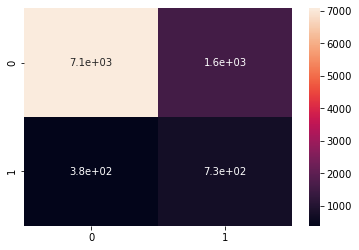

In [56]:
sn.heatmap(matrix, annot=True)
plt.show()

### 4.
__________

In [57]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Precision:  0.3167675021607606
Recall:  0.6579892280071813
F1-Score:  1.9739676840215439


### 5.
__________

Probabilities:  [[9.83150926e-01 1.68490744e-02]
 [9.83200557e-01 1.67994426e-02]
 [9.98348409e-01 1.65159068e-03]
 ...
 [5.18796326e-59 1.00000000e+00]
 [9.87644251e-01 1.23557494e-02]
 [9.89705699e-01 1.02943012e-02]]


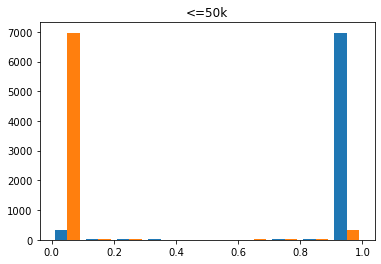

In [58]:
# Class probabilities in test set
prob = gnb.predict_proba(x_test)
print("Probabilities: ", prob)

#separate dataframe by class labels '<=50k' and '>50k'
less_than_50k = df.loc[df['income'] == 0]
greater_than_50k = df.loc[df['income'] == 1]

# <=50K:
#saved target variable columns
target_label = less_than_50k['income']
#separated feature labels
feature_labels = less_than_50k.drop(['income'], axis=1)

#train test ratio 70 30
x_train, x_test, y_train, y_test = train_test_split(feature_labels, target_label, test_size=0.30, random_state=0)

less_than_50k_proba = gnb.predict_proba(x_test)

plt.title("<=50k")
plt.hist(less_than_50k_proba)
plt.show()

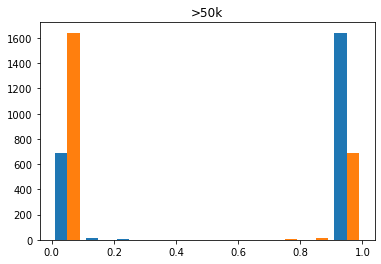

In [59]:
# >50K:
#saved target variable columns
target_label = greater_than_50k['income']
#separated feature labels
feature_labels = greater_than_50k.drop(['income'], axis=1)

#train test ratio 70 30
x_train, x_test, y_train, y_test = train_test_split(feature_labels, target_label, test_size=0.30, random_state=0)

greater_than_50k_proba = gnb.predict_proba(x_test)

plt.title(">50k")
plt.hist(greater_than_50k_proba)
plt.show()